# HDDT analysis - Occupations #

## An analysis of the ocupations associated with members of the CEDA 1830 -1870 ##

<img src="occupation.png">

The graph illustration above shows all of the occupation data in the database rendered by gexf (see iterative sections 1 and 2) 

# Introduction #

1448 members of the community are recorded as members of 93 occupations and each of these occupations constitutes a sphere of interest where meetings between members concerning the CEDA may have taken place, equally they may also be places where members might meet up only infrequently or informally. The visual analysis of connectivity between members in single occupations and between members with multiple occupations indicates the extent that the community is occupationally connected. The 1448 make up 47% of the entire community. 

The above graph shows the 1441 distributed by occupation with the connectivity between them reflected in those members who have been associated with more than one occupation.  

In [1]:
# First we call up the python packages we need to perform the analysis:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(20, 10))
from operator import itemgetter
import networkx as nx
from networkx.algorithms import community #This part of networkx, for community detection, needs to be imported separately.
import nbconvert
import csv

## Iterative Section 1 - (This is an iterative workbook) ##

As can be seen in the illustrative graph above which has been produced in Gephi to provide an initial overview of the data and its distribution, the graph might be made more meaningful if it did not include occupations sparsely populated. 

The code cell below and the code cells in the section Iterative Section 2 (below) have been designed so that a second run through the workbook can subsequently be made where the second run uses data that excludes low populated occupations.

In [21]:
# Second we call up the csv files generated from the SQL database that contain information about 
# locations and the community members associated with locations. As well as enabling the locations to be listed 
# we produce a 'node_names' file and a tuples file of edges_attributes to generate the files need to 
# produce GefX files for Gephi.

# We can run the code cell twice, first with all data and once all data has been examined
# and a decision made to exclude 'noise' the code block can be run again with newly generated 
# csv files that exclude low populated locations.

occupation = pd.read_csv ('occupation_202107221306.csv')

# Use these csv files in the 'with open' statements below to generate locations.gexf
names = pd.read_csv ('vw_3_occupation_names_1_2_202108031133.csv')# For nodes csv
tuples = pd.read_csv ('vw_2_occupation_membership_xid_202108031139.csv')# For edges.csv

# Use these csv files in the 'with open' statements below to generate locations_10.gexf
occupation_10_names = pd.read_csv ('vw_occupation_10_names_1_2_202108031556.csv') # For nodes csv
occupation_10_tuples = pd.read_csv ('vw_occupation_10_202108031556.csv') # For edges.csv


with open('vw_occupation_10_names_1_2_202108031556.csv', 'r') as nodecsv: # Open the Nodes csv file
    nodereader = csv.reader(nodecsv) # Read the csv
    nodes = [n for n in nodereader][1:]# Retrieve the data (using Python list comprhension and list slicing
                                       # to remove the header row
    node_names = [n[0] for n in nodes] # Get a list of only the node names

with open('vw_occupation_10_202108031556.csv', 'r') as edgecsv: # Open the file
    edgereader = csv.reader(edgecsv) # Read the csv
    edge_list = list(edgereader) # Convert to list, so can iterate below in for loop
    
    # Create empty arrays to store edge data and edge attribute data
    edges = []
    edges_attributes = []
    
    # Fill the arrays with data from CSV
    for e in edge_list[1:]:
        edges.append(tuple(e[0:2])) # Get the first 2 columns (source, target) and add to array
        # not used this time. edges_attributes.append(tuple(e[2:4])) 
        # Get the 3rd and 4th columns (first_year, last_year) and add to array
    
edge_names = [e[0] for e in edges] # Get a list of only the edge names   

## We begin by listing out and validating all of the occupation data in the database ##

In [17]:
# List out the occupations to be analysed

occupation

,id,name,notes
0,1,literary,NaN
1,3,medical,NaN
2,4,armed services,NaN
3,5,political,NaN
4,6,church,NaN
...,...,...,...
88,90,farmer,NaN
89,91,clockmaker,NaN
90,92,plant collector,NaN
91,93,private means,NaN


In [9]:
# List out the community members who have been associated with at least one occupation.

names

,Name
0,A A Stewart
1,A B Stark
2,A C Brebner
3,A G Cross
4,A H Russell
...,...
1443,x Tinsley
1444,x Tumangung of Jehore
1445,x White
1446,x Wienecke


In [10]:
# Finally list out the tuples of members and occupations 
# (Note - some members are associated with more that one occupation)

tuples

,Source,Target
0,Arthur William A Beckett,literary
1,Andrew Mercer Adam,medical
2,Andrew Mercer Adam,armed services
3,William Adam,political
4,William (2) Adams,medical
...,...,...
1878,W Holt Yates,medical
1879,James Yearsley,medical
1880,Stephen Yeldham,medical
1881,James A Youl,business


## Use pyplot to make an inital visualisation of the data ##

We can see that many occupations are thinly populated. 

We can also see that whilst 'medical' is the largest occupational segment several other occupations are well represented. 

none of the inital segmentation requires qualification but we should be aware that many of the lesser occupations could have easily appeared in the 'academic' category instead of being separated out.

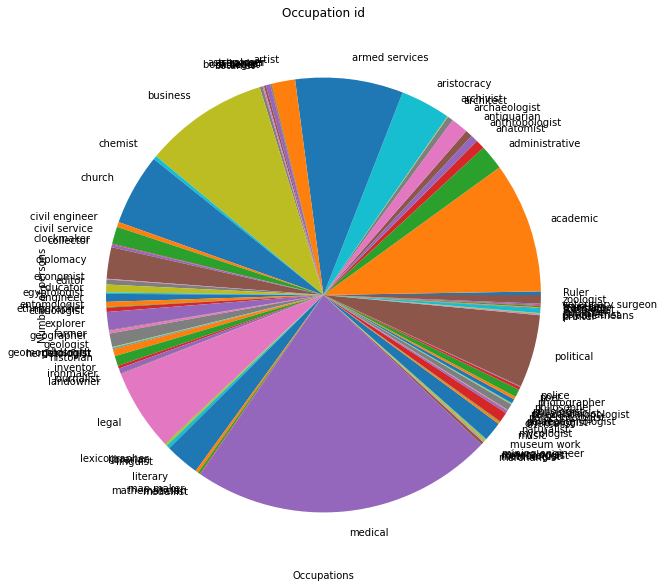

In [12]:
tuples.groupby('Target')['Source'].nunique().plot(kind='pie')
plt.title ("Occupation id")
plt.xlabel ("Occupations")
plt.ylabel ("Number of persons")
plt.show()

## Iterative Section 2 - prepare the data for rendering as a graph in Gephi ##

### Caution - this section depends on the selections made under 'Iterative Section 1' above ###

If the initial analysis suggests that a more insightful visualisation might be made by refing the data to be analysed, return to the database and make a new Nodes (Names) csv file and a new Tuples csv file.

Return to Iterative Section 1 codeblock in the workbook and replace the csv files in the 'with open' code lines.

Set the nx.write_gexf (xxx.gexf) xxx statement to a new file name.

Then run all code blocks again and make a more insightful gexf file for Gephi.

Ensure that the statement nx.write_gexf(G, 'locations.gexf') in the last code cell in this section points to the desired output file for Gephi. Failure to set this value correctly will result in the previously generated .gexf file being overwritten


In [26]:
print("Nodes length: ", len(node_names))
print("Edges length: ", len(edges))
# not used this time. print("Edges attributes length: ", len(edges_attributes)) # This should be the same length as edges

Nodes length:  1185
Edges length:  1410


In [27]:
# First check that the data is correctly formatted

print("First 5 nodes:", node_names[0:5])
print("First 5 edges:", edges[0:5])
# not used this time. print("First 5 edges attributes:", edges_attributes[0:5])

# The output will appear below this code cell.

First 5 nodes: ['A A Stewart', 'A B Stark', 'A G Cross', 'A H Russell', 'A Ioannides']
First 5 edges: [('Arthur William A Beckett', 'literary'), ('Andrew Mercer Adam', 'medical'), ('Andrew Mercer Adam', 'armed services'), ('William Adam', 'political'), ('William (2) Adams', 'medical')]


In [28]:
# We use NetworkX to build the graph data into a table

G = nx.Graph()
G.add_nodes_from(node_names)
G.add_edges_from(edges)
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 1185
Number of edges: 1410
Average degree:   2.3797


In [29]:
# Finally we can write a gexf file which will be placed in the root directory.
# We can then open the file in Gephi and visualise the network.

nx.write_gexf(G, 'occupations_10.gexf')

## Stage 2 - Occupations analysis with 'noise' removed (low populated locations excluded). ##

We now re-run the code to generate a new gexf file for gephi. We use the refined pair of nodes (Names) and Tuples files generated in the SQL database that include only the top 10 locations.

In [22]:
occupation_10_names

,Name
0,A A Stewart
1,A B Stark
2,A G Cross
3,A H Russell
4,A Ioannides
...,...
1180,x Stuart
1181,x Tasmania
1182,x Tinsley
1183,x White


In [23]:
location_10_tuples

,Source,Target
0,Arthur William A Beckett,literary
1,Andrew Mercer Adam,medical
2,Andrew Mercer Adam,armed services
3,William Adam,political
4,William (2) Adams,medical
...,...,...
1405,W Holt Yates,medical
1406,James Yearsley,medical
1407,Stephen Yeldham,medical
1408,James A Youl,business


## We now have a graph of the dataset that can be analysed more easily ##

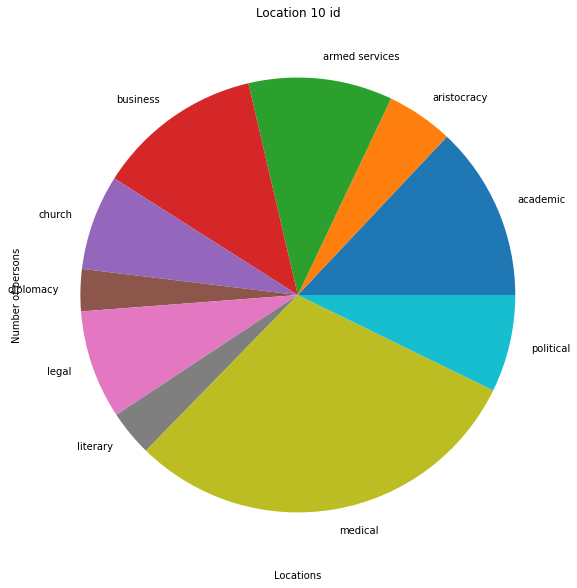

In [25]:
location_10_tuples.groupby('Target')['Source'].nunique().plot(kind='pie')
plt.title ("Location 10 id")
plt.xlabel ("Locations")
plt.ylabel ("Number of persons")
plt.show()

<img src="occupation_10.png">

We can see that 'medical','academic' and 'armed services' together account for half of the members by occupation. We can also see that the largest three occupational categories each contain many members who have no association with any other occupational group. We can see that the medical categories contain many members who are also members of the other two principal categories ('academic' and 'armed services'). It is highly likely that these members served as conduits of communication and group cohesion amongst the three principal occupational cegories. 

Seven other occupations each have a range of members with literary the lowest and business the highest. All of the satellite groups relate directly to the triple centre with many members also associated with more that one other satellite occupation.

It is surprising the the least networked occupation is 'church' and perhaps less so that 'business' and 'legal'are highly networked.

Several individuals form a web of interconnectedness between the members occupations. 